<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/CNN/blob/main/CNN_ImageClassification(Multiclass).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
urllib.request.urlretrieve(url, "10_food_classes_all_data.zip")

('10_food_classes_all_data.zip', <http.client.HTTPMessage at 0x250c25689e0>)

In [49]:
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [1]:
import urllib.request
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"
urllib.request.urlretrieve(url, "10_food_classes_10_percent.zip")

('10_food_classes_10_percent.zip', <http.client.HTTPMessage at 0x1909fc43bf0>)

In [2]:
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [9]:
import os
import pathlib
import numpy as np

data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(directory):
  rand_index = random.randint(0, 9)
  class_names[rand_index]
  folder = directory + class_names[rand_index]
  img_path = random.choice(os.listdir(folder))
  img = mpimg.imread(folder + "/" + img_path)
  plt.imshow(img)
  plt.title(class_names[rand_index])
  plt.axis("off")


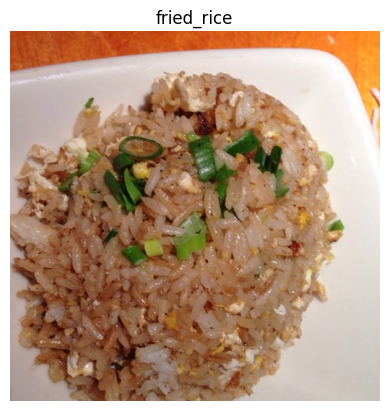

In [48]:
view_random_image("10_food_classes_all_data/train/")